In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns # doesnt have a pie chart so we use plotly

In [ ]:
pd.read_csv("IndiaTop10Cities.csv")

In [3]:
# data source https://worldpopulationreview.com/countries/india-population
df = pd.read_csv("IndiaTop10Cities.csv",thousands=',') #thousands is used to remove the comma in the numbers
df

,City,Population
0,Mumbai,12691836
1,Delhi,10927986
2,Bengaluru,5104047
3,Kolkata,4631392
4,Chennai,4328063
5,Ahmedabad,3719710
6,Hyderabad,3597816
7,Pune,2935744
8,Surat,2894504
9,Kanpur,2823249


In [4]:
df.info() # check whether population had been read as int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        10 non-null     object
 1   Population  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [5]:
px.bar(df, x="City", y="Population", width=700, title="Current Population of the top 10 Cities.")

In [6]:
px.bar(df, x="City", y="Population", width=700, title="Current Population of the top 10 Cities.").update_layout(
    xaxis={"categoryorder":'category ascending'})  # to sort the x axis based on city name

In [7]:
px.bar(df.sort_values(by=['City']), x="City", y="Population", width=700, title="Current Population of the top 10 Cities.") # sort the df itself and plot

In [8]:
px.bar(df, y="City", x="Population", width=700)

In [9]:
px.bar(df, y="City", x="Population", width=700).update_layout(yaxis={'categoryorder':'total ascending'}) # sort based on the population

In [10]:
px.bar(df, y="City", x="Population", width=700).update_layout(yaxis={'categoryorder':'category descending'})

In [13]:
import warnings 
warnings.filterwarnings('ignore')

<Axes: xlabel='Population', ylabel='City'>

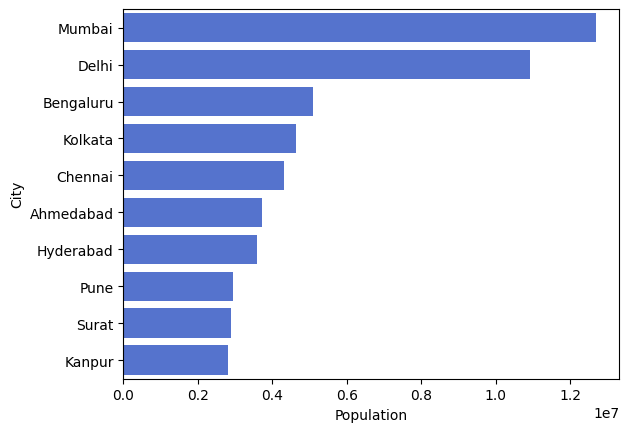

In [14]:
sns.barplot(df,x="Population",y="City", color = "royalblue")

<Axes: xlabel='Population', ylabel='City'>

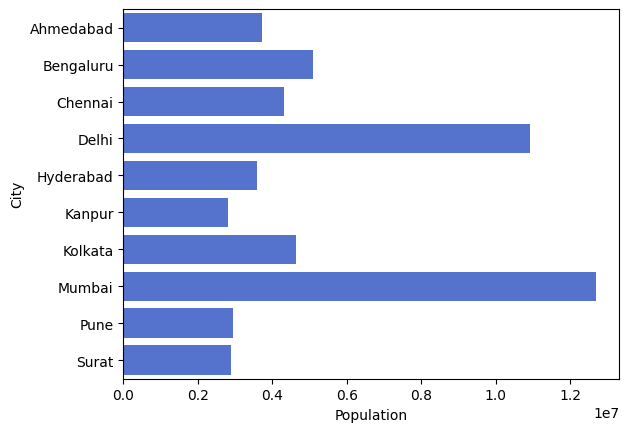

In [15]:
sns.barplot(df.sort_values(by=['City']),x="Population",y="City", color = "royalblue")

### Population Pyramid

In [16]:
# Source https://www.populationpyramid.net/india/2020/
df=pd.read_csv("India-2020.csv")
df.head()

,Age,M,F
0,0-4,60771734,55952175
1,5-9,63921193,58262875
2,10-14,65906416,59814870
3,15-19,67689391,61362594
4,20-24,65745248,59457333


In [17]:
# Wide format to Long format conversion
pd.melt(
    df.head(),
    id_vars=['Age'], 
    value_vars=['M', 'F']
) 
'''
- melt is used to convert wide format to long format meaning we are converting the columns to rows
- wide format is when we have multiple columns for the same variable
- long format is when we have only one column for the same variable
- id_vars is the column that we want to keep as it is
- value_vars is the column that we want to convert to rows
- value_name is the name of the column that will contain the values
- var_name is the name of the column that will contain the variable names
'''

,Age,variable,value
0,0-4,M,60771734
1,5-9,M,63921193
2,10-14,M,65906416
3,15-19,M,67689391
4,20-24,M,65745248
5,0-4,F,55952175
6,5-9,F,58262875
7,10-14,F,59814870
8,15-19,F,61362594
9,20-24,F,59457333


In [21]:
df_melt = pd.melt(
    df,
    id_vars=['Age'], 
    value_vars=['M', 'F'],
    var_name='Gender', 
    value_name='population'
)
df_melt

,Age,Gender,population
0,0-4,M,60771734
1,5-9,M,63921193
2,10-14,M,65906416
3,15-19,M,67689391
4,20-24,M,65745248
5,25-29,M,62448055
6,30-34,M,58647559
7,35-39,M,53259451
8,40-44,M,46635683
9,45-49,M,41235303


In [22]:
px.bar(df_melt,x="population", y = "Age", color="Gender", barmode="relative") 
#One of 'group', 'overlay' or 'relative'
# group - bars are placed beside each other
# overlay - bars are placed over each other
# relative - bars are placed over each other and are normalized to 100%

Above plot is still not a pyramid

A simple trick is to make the y-axis a negative value

In [29]:
df["F"] =  -df["F"]
df.head()

,Age,M,F
0,0-4,60771734,-55952175
1,5-9,63921193,-58262875
2,10-14,65906416,-59814870
3,15-19,67689391,-61362594
4,20-24,65745248,-59457333


Now melt the data again

In [30]:
df_melt = pd.melt(
    df,
    id_vars=['Age'],
    value_vars=['M', 'F'],
    var_name='Gender', 
    value_name='population'
)

In [31]:
px.bar(df_melt,x="population", y = "Age", color="Gender", barmode="relative") 
#'relative' mode, bars are stacked above zero for positive values and below zero for negative values
# see https://plotly.com/python-api-reference/generated/plotly.express.bar

We have a pyramid bar plot but there is still a small problem

Population is shown as negative values which can be confusing

They are called tick points and text value is tick names, they need to be changed

In [32]:
px.bar(df_melt,x="population", y = "Age", color="Gender", barmode="relative").update_layout(
    title = 'Population Pyramid of India-2021',
    height = 500,
    title_font_size = 22,
    bargap = 0.0,
    xaxis = dict(
        tickvals = [-60000000, -40000000, -20000000,
                     0, 20000000, 40000000, 60000000],                           
        ticktext = ['6M', '4M', '2M', '0', 
              '2M', '4M', '6M', '8M'],
        title = 'Population in Millions',
        title_font_size = 14
    ) # xaxis where we can change the tick values and tick text
)

Still a small problem -> when you hover over a bar the female population is shown as negative, to change this we need to change the hover name using the hover_name parameter

### [World bank data](https://databank.worldbank.org/home.aspx) access.

In [33]:
#!pip install wbgapi
import wbgapi as wb
# See https://github.com/tgherzog/wbgapi for details

In [ ]:
help(wb.series)

In [ ]:
wb.series.info(q="women")

In [ ]:
wb.data.DataFrame('SG.GEN.PARL.ZS', wb.region.members('AFR'))

In [ ]:
wb.series.info(q="population")

In [38]:
df_percent_women = wb.data.DataFrame('SP.POP.TOTL.FE.ZS',wb.economy.coder("INDIA")) # wb.economy.coder("INDIA") is used to get the country code for India
df_percent_women.head()

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
IND,48.394839,48.38181,48.369728,48.358249,48.347179,48.337117,48.327706,48.318456,48.308964,48.298804,...,48.314901,48.322726,48.328633,48.333733,48.339232,48.345689,48.353783,48.366937,48.385756,48.405706


In [39]:
df_population = wb.data.DataFrame('SP.POP.TOTL',wb.economy.coder("INDIA"))
df_population.head()

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
IND,445954579.0,456351876.0,467024193.0,477933619.0,489059309.0,500114346.0,510992617.0,521987069.0,533431909.0,545314670.0,...,1.291132e+09,1.307247e+09,1.322867e+09,1.338636e+09,1.354196e+09,1.369003e+09,1.383112e+09,1.396387e+09,1.407564e+09,1.417173e+09


In [40]:
df=df_population.T
df.head()

economy,IND
YR1960,445954579.0
YR1961,456351876.0
YR1962,467024193.0
YR1963,477933619.0
YR1964,489059309.0


In [41]:
df=df.rename(columns={"IND":"total"})
df.head()

economy,total
YR1960,445954579.0
YR1961,456351876.0
YR1962,467024193.0
YR1963,477933619.0
YR1964,489059309.0


In [42]:
df_w = df_percent_women.T
df_w.head()

economy,IND
YR1960,48.394839
YR1961,48.381810
YR1962,48.369728
YR1963,48.358249
YR1964,48.347179


In [43]:
df_w = df_w.rename(columns={"IND":"Female %"})
df_w.head()

economy,Female %
YR1960,48.394839
YR1961,48.381810
YR1962,48.369728
YR1963,48.358249
YR1964,48.347179


In [52]:
df_concat = pd.concat([df, df_w], axis=1)

In [53]:
df_concat

economy,total,Female %
YR1960,4.459546e+08,48.394839
YR1961,4.563519e+08,48.381810
YR1962,4.670242e+08,48.369728
YR1963,4.779336e+08,48.358249
YR1964,4.890593e+08,48.347179
...,...,...
YR2018,1.369003e+09,48.345689
YR2019,1.383112e+09,48.353783
YR2020,1.396387e+09,48.366937
YR2021,1.407564e+09,48.385756


In [54]:
df_concat["Male"] = df_concat["total"]*(100 - df_concat["Female %"])/100 # column to find percentage of male population

In [55]:
df_concat["Female"] = df_concat["total"]*df_concat["Female %"]/100
df_concat.head()

economy,total,Female %,Male,Female
YR1960,445954579.0,48.394839,230135579.0,215819000.0
YR1961,456351876.0,48.381810,235560577.0,220791299.0
YR1962,467024193.0,48.369728,241125861.0,225898332.0
YR1963,477933619.0,48.358249,246813290.0,231120329.0
YR1964,489059309.0,48.347179,252612930.0,236446379.0


In [56]:
df_concat=df_concat.reset_index()

In [57]:
df_concat.head()

economy,index,total,Female %,Male,Female
0,YR1960,445954579.0,48.394839,230135579.0,215819000.0
1,YR1961,456351876.0,48.381810,235560577.0,220791299.0
2,YR1962,467024193.0,48.369728,241125861.0,225898332.0
3,YR1963,477933619.0,48.358249,246813290.0,231120329.0
4,YR1964,489059309.0,48.347179,252612930.0,236446379.0


In [58]:
df_melt = pd.melt(df_concat,id_vars=['index','total'], value_vars=['Male', 'Female'],var_name='gender', value_name='population')
df_melt.head()

,index,total,gender,population
0,YR1960,445954579.0,Male,230135579.0
1,YR1961,456351876.0,Male,235560577.0
2,YR1962,467024193.0,Male,241125861.0
3,YR1963,477933619.0,Male,246813290.0
4,YR1964,489059309.0,Male,252612930.0


In [59]:
px.bar(df_melt, x="index", y = "population", color="gender")

In [60]:
px.bar(df_melt, x="index", y = "population", color="gender", barmode="group")

In [61]:
df_concat["Female"] = -df_concat["Female"]
df_concat

economy,index,total,Female %,Male,Female
0,YR1960,4.459546e+08,48.394839,2.301356e+08,-2.158190e+08
1,YR1961,4.563519e+08,48.381810,2.355606e+08,-2.207913e+08
2,YR1962,4.670242e+08,48.369728,2.411259e+08,-2.258983e+08
3,YR1963,4.779336e+08,48.358249,2.468133e+08,-2.311203e+08
4,YR1964,4.890593e+08,48.347179,2.526129e+08,-2.364464e+08
...,...,...,...,...,...
58,YR2018,1.369003e+09,48.345689,7.071492e+08,-6.618541e+08
59,YR2019,1.383112e+09,48.353783,7.143251e+08,-6.687870e+08
60,YR2020,1.396387e+09,48.366937,7.209974e+08,-6.753897e+08
61,YR2021,1.407564e+09,48.385756,7.265034e+08,-6.810604e+08


In [62]:
df_concat["index"] = pd.to_datetime(df_concat["index"],format="YR%Y")
df_concat.head()

economy,index,total,Female %,Male,Female
0,1960-01-01,445954579.0,48.394839,230135579.0,-215819000.0
1,1961-01-01,456351876.0,48.381810,235560577.0,-220791299.0
2,1962-01-01,467024193.0,48.369728,241125861.0,-225898332.0
3,1963-01-01,477933619.0,48.358249,246813290.0,-231120329.0
4,1964-01-01,489059309.0,48.347179,252612930.0,-236446379.0


In [63]:
df_negmelt = pd.melt(df_concat,id_vars=['index'], value_vars=['Male', 'Female'],var_name='gender', value_name='population')
df_negmelt.head()

,index,gender,population
0,1960-01-01,Male,230135579.0
1,1961-01-01,Male,235560577.0
2,1962-01-01,Male,241125861.0
3,1963-01-01,Male,246813290.0
4,1964-01-01,Male,252612930.0


In [64]:
px.bar(df_negmelt, x="index", y = "population", color="gender", barmode="relative").update_layout(title = 'Male Female Population India 1960-2021',
    height = 600,
    title_font_size = 22, 
    bargap = 0.0, 
    yaxis = dict(
        tickvals = [-700000000,-600000000, -400000000, -200000000,
                     0, 200000000, 400000000, 600000000, 700000000,],                           
        ticktext = ['700M', '600M', '400M', '200M', '0', 
              '200M', '400M', '600M', '700M'],
        title = 'Population in Millions',
        title_font_size = 14
    ),
    xaxis = dict(title="Year")
)

In [65]:
px.bar(df_negmelt, y="index", x = "population", color="gender", barmode="relative", orientation="h").update_layout(title = 'Population of Male-Female of India from 1960-2022',
    title_font_size = 22,
    #bargap = 0.0, bargroupgap = 0,
    xaxis = dict(
        tickvals = [-700000000,-600000000, -400000000, -200000000,
                     0, 200000000, 400000000, 600000000, 700000000,],                           
        ticktext = ['700M', '600M', '400M', '200M', '0', 
              '200M', '400M', '600M', '700M'],
        title = 'Population in Millions',
        title_font_size = 14
    ),
    yaxis = dict(title="Year")
)

In [66]:
px.bar(df_negmelt, y="index", x = "population", color="gender", barmode="relative", orientation="h").update_layout(
    title = 'Population of Male-Female of India from 1960-2022',
    title_font_size = 22,
    #bargap = 0.0, bargroupgap = 0,
    xaxis = dict(
        tickvals = [-700000000,-600000000, -400000000, -200000000,
                     0, 200000000, 400000000, 600000000, 700000000,],                           
        ticktext = ['700M', '600M', '400M', '200M', '0', 
              '200M', '400M', '600M', '700M'],
        title = 'Population in Millions',
        title_font_size = 14
    ),
    yaxis = dict(title="year",autorange="reversed")                                                                                                         
)

### Pie Chart of Religion Composition of India
Data Source: https://censusindia.gov.in

In [67]:
#!pip install xlrd
url = "https://censusindia.gov.in/nada/index.php/catalog/11361/download/14474/DDW00C-01%20MDDS.XLS"
df = pd.read_excel(url)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Table,State,Distt.,Tehsil,Town,Area Name,Total/,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,Code,Code,NaN,Rural/,Total,NaN,NaN,...,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Urban,Persons,Males,Females,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,...,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#url = "https://censusindia.gov.in/nada/index.php/catalog/11361/download/14474/DDW00C-01%20MDDS.XLS"
#df = pd.read_excel(url)
url = "DDW00C-01 MDDS.XLS"
df = pd.read_excel(url)
# df = pd.read_csv(url)
df.head(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Table,State,Distt.,Tehsil,Town,Area Name,Total/,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,Code,Code,NaN,Rural/,Total,NaN,NaN,...,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Urban,Persons,Males,Females,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,...,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#df=pd.read_excel(url,header = [2,3], index_col = [5,6])
df=pd.read_excel(url,header = [2,3], index_col = [5,6]) # take the 2nd and 3rd row as header and 5th and 6th column as index, index here means row index and header means column header
df.head(6)

Rural/                    Name               Code                     \
Urban       Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
NaN   NaN                  NaN                NaN                NaN   
      NaN                  NaN                NaN                NaN   
      NaN                  NaN                NaN                NaN   
INDIA Total              C0100                0.0                0.0   
      Rural              C0100                0.0                0.0   
      Urban              C0100                0.0                0.0   

Rural/                                                    Total               \
Urban       Unnamed: 3_level_1 Unnamed: 4_level_1       Persons        Males   
NaN   NaN                  NaN                NaN  1.000000e+00          2.0   
      NaN                  NaN                NaN           NaN          NaN   
      NaN                  NaN                NaN           NaN          NaN   
INDIA Total                0.0                0.0  1.210855e+09  623270258.0   
      Rural                0.0                0.0  8.337489e+08  427781058.0   
      Urban                0.0                0.0  3.771061e+08  195489200.0   

Rural/                          Hindu               ...   Buddhist       Jain  \
Urban            Females      Persons        Males  ...    Females    Persons   
NaN   NaN            3.0          4.0          5.0  ...       18.0       19.0   
      NaN            NaN          NaN          NaN  ...        NaN        NaN   
      NaN            NaN          NaN          NaN  ...        NaN        NaN   
INDIA Total  587584719.0  966257353.0  498306968.0  ...  4146962.0  4451753.0   
      Rural  405967794.0  684093951.0  351423647.0  ...  2357827.0   904809.0   
      Urban  181616925.0  282163402.0  146883321.0  ...  1789135.0  3546944.0   

Rural/                             \
Urban            Males    Females   
NaN   NaN         20.0       21.0   
      NaN          NaN        NaN   
      NaN          NaN        NaN   
INDIA Total  2278097.0  2173656.0   
      Rural   467577.0   437232.0   
      Urban  1810520.0  1736424.0   

Rural/      Other religions and persuasions (incl.Unclassified Sect.)  \
Urban                                                         Persons   
NaN   NaN                                                 22.0          
      NaN                                                  NaN          
      NaN                                                  NaN          
INDIA Total                                          7937734.0          
      Rural                                          7199007.0          
      Urban                                           738727.0          

Rural/                            Religion not stated                        
Urban            Males    Females             Persons      Males    Females  
NaN   NaN         23.0       24.0                25.0       26.0       27.0  
      NaN          NaN        NaN                 NaN        NaN        NaN  
      NaN          NaN        NaN                 NaN        NaN        NaN  
INDIA Total  3952064.0  3985670.0           2867303.0  1463712.0  1403591.0  
      Rural  3583894.0  3615113.0           1643640.0   844124.0   799516.0  
      Urban   368170.0   370557.0           1223663.0   619588.0   604075.0  

[6 rows x 32 columns]

In [ ]:
df.columns.values

In [ ]:
df.loc[("INDIA","Total")][("Total", "Persons")]

In [ ]:
df.columns = ['_'.join(col) for col in df.columns.values]
df.columns

In [ ]:
columns = df.columns[df.columns.str.contains("_Persons")]
columns

In [ ]:
df.loc["INDIA"][columns]

In [ ]:
df1=df.loc["INDIA"][columns]
df1

In [ ]:
df1 = df1.drop(columns=['Total_Persons'])
df1

In [ ]:
df2 = df1.T
df2.head()

In [ ]:
df2 = df2.reset_index()
df2.head()

In [ ]:
df2["index"]=df2["index"].str.removesuffix("_Persons")

In [ ]:
df2

In [ ]:
fig = px.pie(df2, values='Total', names='index', title='Religions composition of India')
fig.show()

In [ ]:
others = df2.iloc[[4,5,6,7]].sum()
others

In [ ]:
df2=df2.drop([4,5,6,7])
df2

In [ ]:
others

In [ ]:
others[0]

In [ ]:
others[0]="Others"

In [ ]:
df2=df2.append(others,ignore_index=True)

In [ ]:
df2

In [ ]:
px.pie(df2, values='Total', names='index', title='Religions composition of India', height=500, width = 500)

# 

In [ ]:
px.pie(df2, values='Total', names='index', title='Religions composition of India', height=600, width = 600, hole=0.5).update_layout(
    legend={"x": 0.5,"y": 0.5, "xanchor" : "center"})

In [ ]:
px.pie(df2, values='Total', names='index', title='Religions composition of India', height=600, width = 600, hole=0.5).update_layout(
    legend={"x": 0.5,"y": 0.5, "xanchor" : "center"}).update_traces(pull=0.1)

In [ ]:
px.pie(df2, values='Total', names='index', title='Religions composition of India', height=600, width = 600, hole=0.6).update_layout(
    legend={"x": 0.5,"y": 0.5, "xanchor" : "center"}).update_traces(pull=[0,0.1])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.pie(df2["Total"], counterclock = False, startangle = 90, autopct = '%1.0f%%', pctdistance=1.1,wedgeprops=dict(width=0.5))
plt.legend(df2["index"], 
           loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
df2

In [ ]:
plt.pie(df2["Total"], counterclock = False, startangle = 90, autopct = '%1.0f%%', pctdistance=1.1,
        wedgeprops=dict(width=0.3), 
        explode = [0,0.1,0,0,0])
plt.legend(df2["index"], 
           loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()